**1. Data Extraction & Visualization: Kenya's Electricity Generation & Demand**

In [2]:
import pandas as pd

In [3]:
generation_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\electricity_generation_data\electricity-generation.csv')
generation_df 

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [ ]:
# Extract Kenya's electricity generation data from generation_df
kenya_generation_df = generation_df[generation_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,Kenya,KEN,2000,4.31
1,Kenya,KEN,2001,4.81
2,Kenya,KEN,2002,5.15
3,Kenya,KEN,2003,5.48
4,Kenya,KEN,2004,6.16


In [5]:
demand_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\electricity_generation_data\electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [6]:
# Extract Kenya's electricity demand data from the demand_df
kenya_demand_df = demand_df[demand_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,Kenya,KEN,2000,4.51
1,Kenya,KEN,2001,4.98
2,Kenya,KEN,2002,5.37
3,Kenya,KEN,2003,5.67
4,Kenya,KEN,2004,6.32


In [7]:
# Merge Kenya's electricity generation and demand data into a single dataframe
electricity_df = pd.merge(
    kenya_demand_df[['Year', 'Electricity demand - TWh']],
    kenya_generation_df[['Year', 'Electricity generation - TWh']],
    on='Year',
    how='inner'
)

electricity_df.head()

,Year,Electricity demand - TWh,Electricity generation - TWh
0,2000,4.51,4.31
1,2001,4.98,4.81
2,2002,5.37,5.15
3,2003,5.67,5.48
4,2004,6.32,6.16


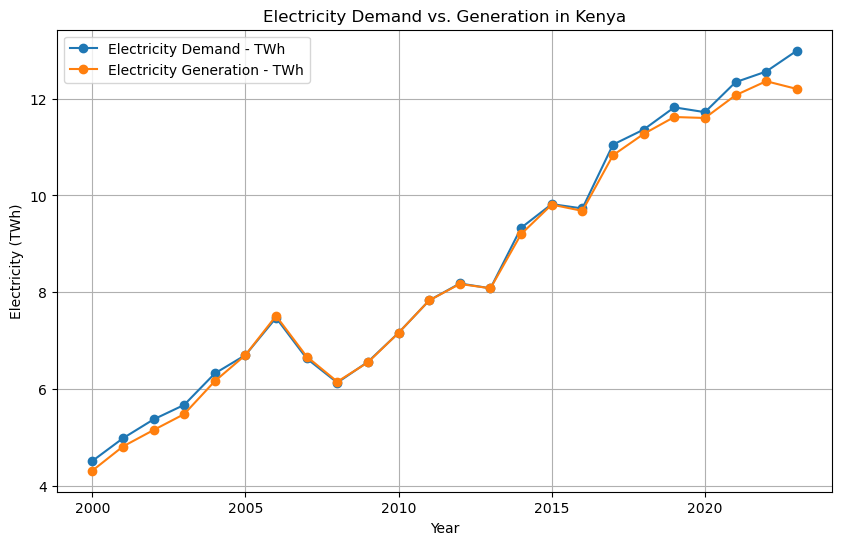

In [8]:
# Visualize Kenya's electricity demand and generation

import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(electricity_df['Year'], electricity_df['Electricity demand - TWh'], label='Electricity Demand - TWh', marker='o')
plt.plot(electricity_df['Year'], electricity_df['Electricity generation - TWh'], label='Electricity Generation - TWh', marker='o')


plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.title('Electricity Demand vs. Generation in Kenya')
plt.legend()
plt.grid(True)

plt.show()

**2. Data Extraction and Visualization: Renewable Potential**

*a. Wind Potential*

In [ ]:
import rasterio

file_path = r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file

profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [10]:
import numpy as np
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [11]:
# Open the TIFF file
with rasterio.open(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392)}
Dimensions (Height x Width): 3806 x 4149
Number of Bands: 1
Coordinate Reference System (CRS): GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Affine Transformation: | 0.00, 0.00, 33.91|
| 0.00,-0.00, 4.62|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan na

In [12]:
# Check the no data value
no_data_value = src.nodata

# Create a mask for the no data values
masked_data = np.ma.masked_equal(raster_data, no_data_value)

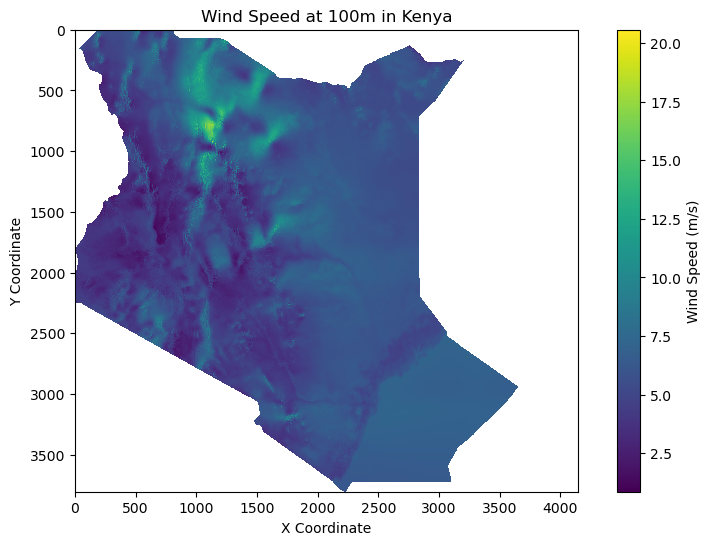

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Wind Speed at 100m in Kenya')
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

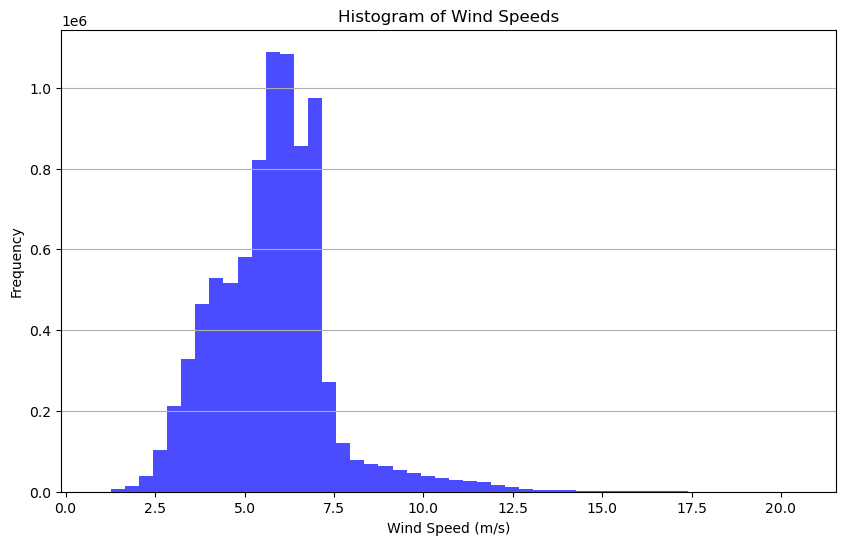

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Identify areas with high average wind speeds, which may be potential sites for wind energy development:

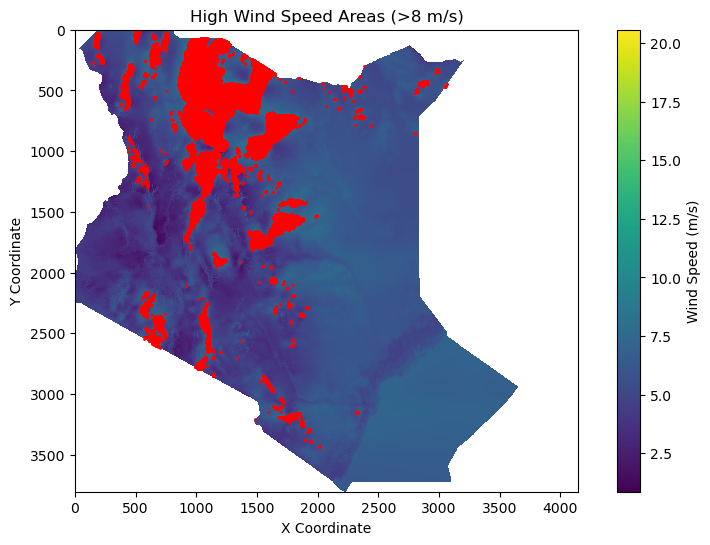

In [18]:
# Define a threshold for high wind speed
high_wind_threshold = 8  # m/s, adjust based on your criteria
high_wind_areas = np.where(masked_data > high_wind_threshold)

# Plot high wind areas
plt.figure(figsize=(10, 6))
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.scatter(high_wind_areas[1], high_wind_areas[0], color='red', s=1)  # s is the size of points
plt.title('High Wind Speed Areas (>8 m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

In [19]:
# Load the wind TIFF file
wind_speed = r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


*b. Photovoltaic Potential*

In [ ]:
# David

**3. Data Extraction & Visualization: Kenya's Population Density**

In [9]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import LineString, Point
import rasterio as rio
import io
import shapely
import fiona

In [10]:
# Kenya's population density: 2000
pop_density2000 = gpd.read_file(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning-in-Kenya\data\pop_density_data\pop_density_data\2000.csv', engine='pyogrio')
pop_density2000 = pop_density2000.astype({
    'X':float,
    'Y':float,
    'Z':float})

# Kenya's population density: 2020
pop_density2020 = gpd.read_file(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning-in-Kenya\data\pop_density_data\pop_density_data\2020.csv', engine='pyogrio')
pop_density2020 = pop_density2020.astype({
    'X':float,
    'Y':float,
    'Z':float})


print('Kenyas Population Density: 2000', pop_density2000.head())

print('Kenyas Population Density: 2020', pop_density2020.head())


Kenyas Population Density: 2000            X         Y         Z
0  35.244583  5.462084  1.416720
1  35.252917  5.462084  1.413419
2  35.261250  5.462084  1.418887
3  35.269583  5.462084  1.457395
4  35.277917  5.462084  1.512301
Kenyas Population Density: 2020            X         Y          Z
0  35.244583  5.462084  52.668011
1  35.252917  5.462084  42.566807
2  35.261250  5.462084  39.304050
3  35.269583  5.462084  41.851067
4  35.277917  5.462084  38.238289


In [11]:
# 2000 Geometry
pop_density2000 = gpd.GeoDataFrame(
    pop_density2000, geometry=gpd.points_from_xy(pop_density2000.X, pop_density2000.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})

# 2020 Geometry
pop_density2020 = gpd.GeoDataFrame(
    pop_density2020, geometry=gpd.points_from_xy(pop_density2020.X, pop_density2020.Y), crs="EPSG:4326"
).drop(columns=['X','Y']).rename(columns={'Z':'Density'})


print('Kenyas Population Density Geometry: 2000', pop_density2020.head())
print('Kenyas Population Density Geometry: 2020', pop_density2000.head())

Kenyas Population Density Geometry: 2000      Density                  geometry
0  52.668011  POINT (35.24458 5.46208)
1  42.566807  POINT (35.25292 5.46208)
2  39.304050  POINT (35.26125 5.46208)
3  41.851067  POINT (35.26958 5.46208)
4  38.238289  POINT (35.27792 5.46208)
Kenyas Population Density Geometry: 2020     Density                  geometry
0  1.416720  POINT (35.24458 5.46208)
1  1.413419  POINT (35.25292 5.46208)
2  1.418887  POINT (35.26125 5.46208)
3  1.457395  POINT (35.26958 5.46208)
4  1.512301  POINT (35.27792 5.46208)


In [12]:
desc_pop_density2000 = pop_density2000.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2000', desc_pop_density2000)

desc_pop_density2020 = pop_density2020.Density.describe(percentiles=[.95])
print('Kenyas Population Density Decription: 2020', desc_pop_density2020)

Kenyas Population Density Decription: 2000 count    680385.000000
mean         50.927232
std         320.932973
min           0.000000
50%           4.618363
95%         259.467688
max       73272.679688
Name: Density, dtype: float64
Kenyas Population Density Decription: 2020 count    680262.000000
mean         95.214693
std         661.822734
min           0.000000
50%          12.548709
95%         438.835638
max      167454.390625
Name: Density, dtype: float64


In [13]:
ke_counties = gpd.read_file(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning-in-Kenya\data\income_level_data_1\GSAP_AM24_2021.shp', engine='pyogrio',
                                   where="code='KEN'")

ke_counties.head()

,code,geo_year,geo_source,geo_level,geo_idvar,geo_id,geo_nvar,geo_name,geo_code,geometry
0,KEN,2022.0,GADM,1,GID_1,KEN.1_1,NAME_1,Baringo,KEN_2022_GADM1_KEN.1_1,"MULTIPOLYGON (((35.7388 -0.19544, 35.72428 -0...."
1,KEN,2022.0,GADM,1,GID_1,KEN.2_1,NAME_1,Bomet,KEN_2022_GADM1_KEN.2_1,"POLYGON ((35.26033 -1.01608, 35.26021 -1.01621..."
2,KEN,2022.0,GADM,1,GID_1,KEN.3_1,NAME_1,Bungoma,KEN_2022_GADM1_KEN.3_1,"POLYGON ((34.91305 0.85131, 34.91327 0.85148, ..."
3,KEN,2022.0,GADM,1,GID_1,KEN.4_1,NAME_1,Busia,KEN_2022_GADM1_KEN.4_1,"POLYGON ((34.02698 -0.01568, 34.02082 -0.02018..."
4,KEN,2022.0,GADM,1,GID_1,KEN.5_1,NAME_1,Elgeyo-Marakwet,KEN_2022_GADM1_KEN.5_1,"MULTIPOLYGON (((35.53068 0.22495, 35.53475 0.2..."


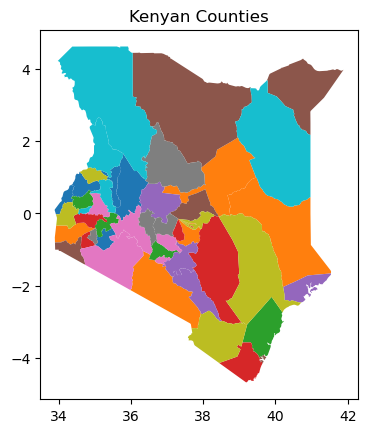

In [14]:
import matplotlib.pyplot as plt

ax = ke_counties.plot(column='geo_name')
ax.set_title("Kenyan Counties")
plt.show()

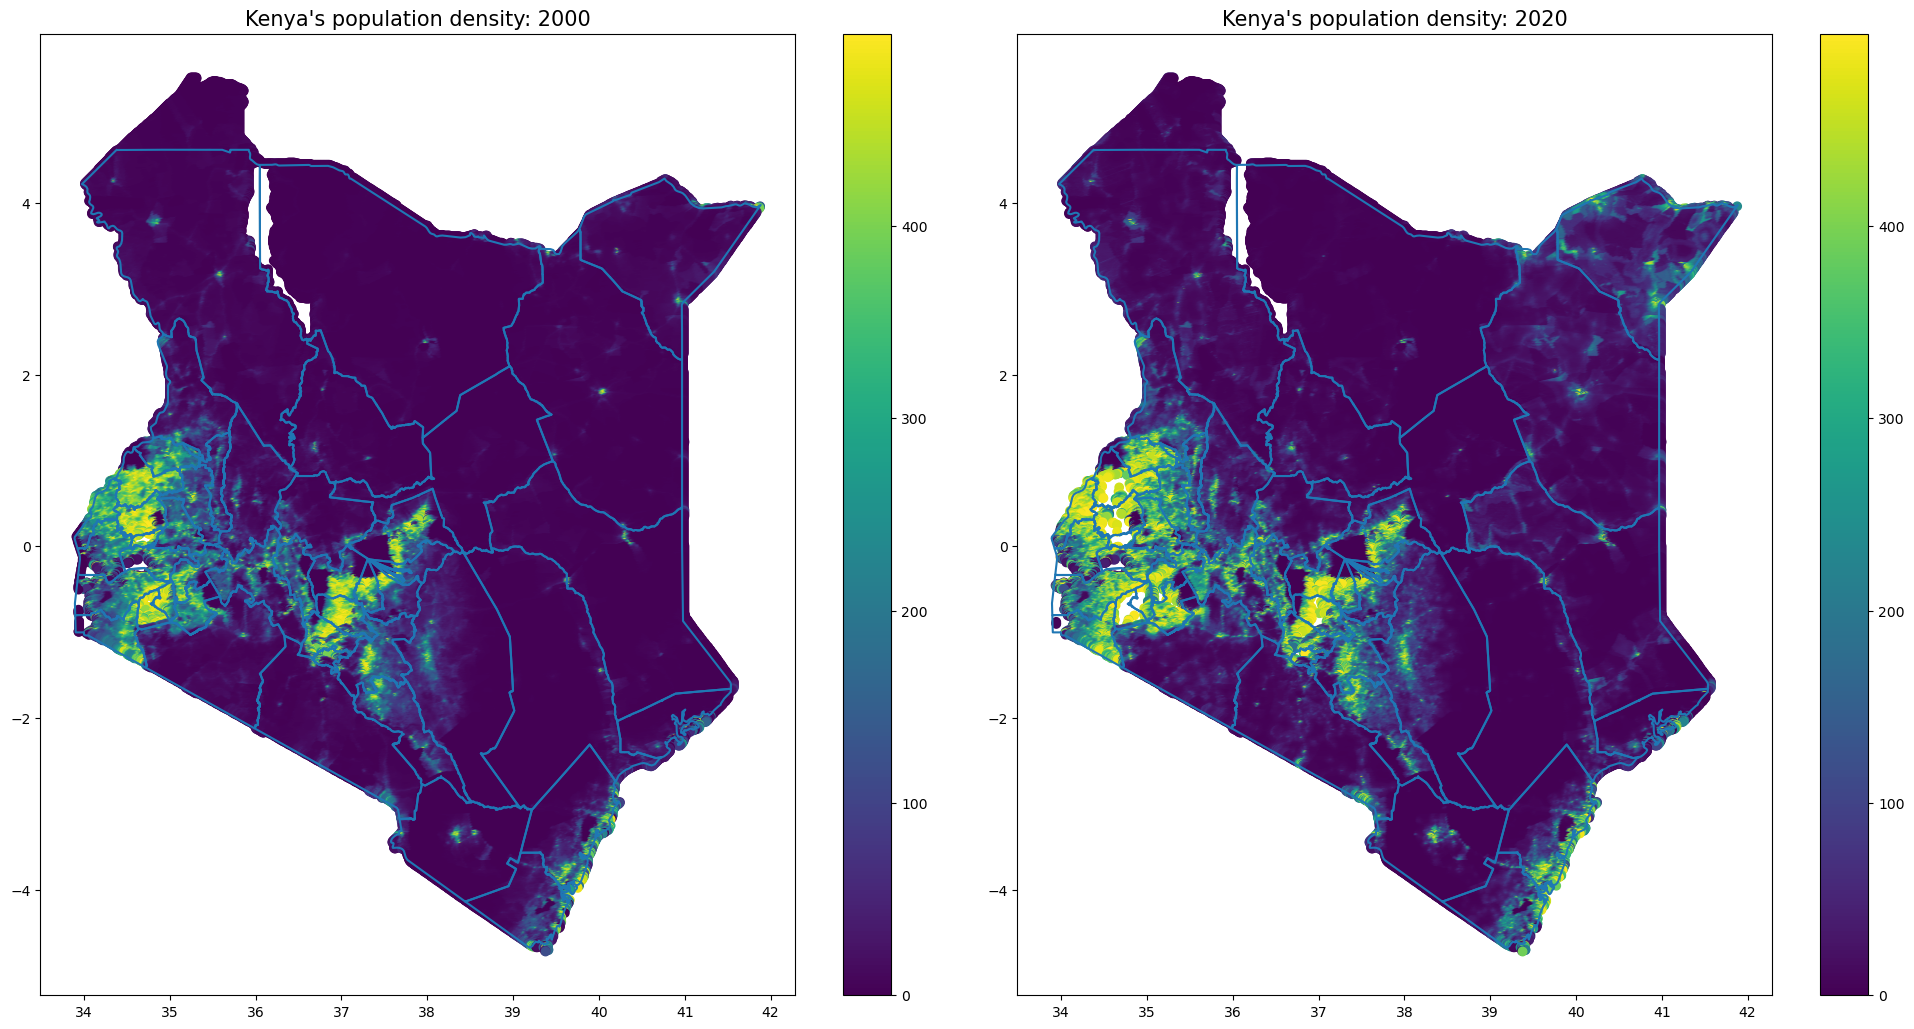

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Kenya's population density: 2000
base1 = ke_counties.boundary.plot(ax=axes[0])
pop_density2000.query('Density < 500').plot(ax=base1, column='Density', legend=True)
axes[0].set_title("Kenya's population density: 2000", fontsize=15)

# Kenya's population density: 2020
base2 = ke_counties.boundary.plot(ax=axes[1])
pop_density2020.query('Density < 500').plot(ax=base2, column='Density', legend=True)
axes[1].set_title("Kenya's population density: 2020", fontsize=15)

plt.tight_layout()
plt.show()


In [19]:
import glob
import os

# Define the path to your CSV files
path = r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning-in-Kenya\data\pop_density_data\pop_density_data'
pop_files = glob.glob(path + "/*.csv")

# Initialize a list to hold each DataFrame
pop_dfs = []

# Loop over each file to process it
for file in pop_files:
    year = os.path.basename(file).split('.')[0]
    pop_df = pd.read_csv(file)
    pop_df = pop_df.rename(columns={'Z': year, 'X':'Latitude', 'Y':'Longitude'})

    # Append the DataFrame to the list
    pop_dfs.append(pop_df)

# Merge all DataFrames on 'X' and 'Y' columns
pop_density_df = pop_dfs[0]
for pop_df in pop_dfs[1:]:
    pop_density_df = pop_density_df.merge(pop_df, on=['Latitude', 'Longitude'], how='outer')

pop_density_df

,Latitude,Longitude,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,35.244583,5.462084,1.416720,1.396852,1.624173,1.924415,2.429911,2.503574,3.391726,3.823526,...,7.716132,10.052105,11.457187,17.609232,18.419613,21.129835,26.949865,35.308475,39.717140,52.668011
1,35.252917,5.462084,1.413419,1.372664,1.583961,1.867518,2.361063,2.378553,3.223956,3.587913,...,7.106965,8.990801,10.381531,15.599761,15.981864,17.861954,23.140518,29.548529,32.403442,42.566807
2,35.261250,5.462084,1.418887,1.330445,1.540141,1.809350,2.250990,2.280811,3.042585,3.314642,...,6.575239,8.322875,9.466146,14.218251,14.787646,16.177166,21.212101,26.670294,29.277493,39.304050
3,35.269583,5.462084,1.457395,1.385305,1.572818,1.860333,2.281828,2.322971,3.142808,3.381774,...,6.775673,8.556246,9.631298,14.553508,15.171118,16.479475,22.152906,27.807093,30.655039,41.851067
4,35.277917,5.462084,1.512301,1.383120,1.565848,1.837749,2.219377,2.283923,3.029301,3.247593,...,6.441066,7.914247,9.031144,13.881150,14.152464,15.410886,20.551128,25.901073,28.307270,38.238289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680380,39.402917,-4.704583,126.856934,114.480789,92.233864,51.968880,38.705093,36.720055,32.964993,33.610413,...,41.805164,38.985413,81.165375,39.789425,75.514580,152.778000,154.110641,143.955246,149.165466,166.426895
680381,39.411250,-4.704583,172.707367,150.494247,120.754379,74.849098,54.277927,52.671711,47.649155,47.568836,...,60.505344,56.823631,107.771729,59.105076,106.717369,199.424561,185.219086,184.364685,194.443283,205.901260
680382,39.369583,-4.712916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
680383,39.377917,-4.712916,67.794678,17.083441,15.369174,15.428894,11.420929,13.993786,11.441626,10.612007,...,12.901483,13.024007,16.545351,13.038383,17.950626,173.214050,202.145950,170.369278,181.272644,208.989548


In [20]:
pop_density_df.isna().sum()

Latitude         0
Longitude        0
2000             0
2001           123
2002           123
2003           123
2004           123
2005           123
2006           123
2007           123
2008           123
2009           123
2010           123
2011           123
2012         15620
2013           123
2014           123
2015           123
2016           123
2017           123
2018           123
2019           123
2020           123
dtype: int64

In [21]:
desc = pop_density_df.describe()

pop_density_df_median = pop_density_df.median()
pop_density_df_mode = pop_density_df.mode().iloc[0]

# Add median and mode to the summary statistics
desc.loc['median'] = pop_density_df_median
desc.loc['mode'] = pop_density_df_mode

desc

,Latitude,Longitude,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,680385.000000,680385.000000,680385.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,...,680262.000000,664765.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000,680262.000000
mean,37.861907,0.573581,50.927232,52.459902,54.000005,55.613002,57.289448,59.018250,60.824189,62.662968,...,70.889556,74.859941,75.513673,77.967967,80.553650,83.250692,86.040443,88.969168,92.033193,95.214693
std,1.913418,2.243391,320.932973,338.698894,349.132566,361.373502,374.837981,387.024269,401.239046,414.478211,...,476.480483,502.057518,512.381152,536.079582,553.170439,573.424865,593.883451,615.075237,637.065595,661.822734
min,33.911250,-4.721250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000256,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.252917,-1.179583,1.313963,1.213779,1.243484,1.267215,1.248924,1.305102,1.379348,1.426990,...,1.699221,1.967763,1.987099,1.819858,2.170963,2.202294,2.339124,2.448167,2.578045,2.688723
50%,37.961250,0.545417,4.618363,4.307683,4.510057,4.749110,4.849887,5.124676,5.464599,5.723913,...,7.065644,7.878909,8.322715,8.067155,9.381569,9.787829,10.520063,11.184121,11.858059,12.548709
75%,39.461250,2.437084,19.172338,18.049306,18.899896,19.815576,19.939114,21.113575,22.152358,23.193607,...,27.750169,30.622528,32.024692,31.613075,35.249906,39.111917,41.275894,43.627444,45.831752,48.195143
max,41.877917,5.462084,73272.679688,78880.398438,82250.742188,87578.140625,90830.289062,95338.015625,98978.320312,102166.289062,...,117108.632812,123729.703125,129937.796875,134740.765625,139931.328125,145386.234375,151110.140625,156010.750000,162006.625000,167454.390625
median,37.961250,0.545417,4.618363,4.307683,4.510057,4.749110,4.849887,5.124676,5.464599,5.723913,...,7.065644,7.878909,8.322715,8.067155,9.381569,9.787829,10.520063,11.184121,11.858059,12.548709
mode,39.219583,-1.012916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.820851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


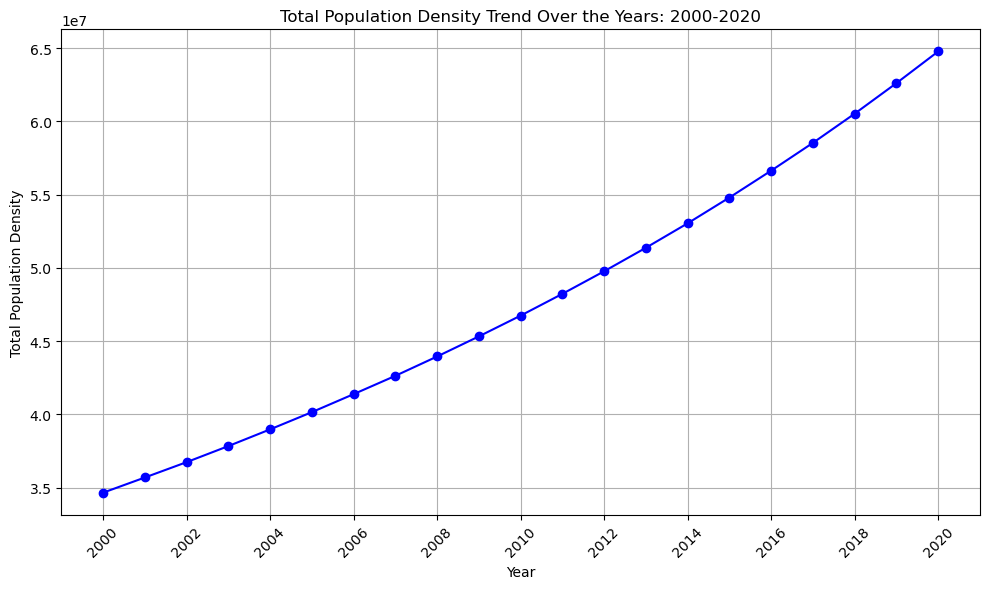

In [22]:
# Total population density per year
year_columns = pop_density_df.columns[2:]
annual_total_density = pop_density_df[year_columns].sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(annual_total_density.index, annual_total_density.values, marker='o', color='b')
plt.xlabel("Year")
plt.ylabel("Total Population Density")
plt.title("Total Population Density Trend Over the Years: 2000-2020")
plt.grid(True)
plt.xticks(ticks=annual_total_density.index[::2], rotation=45)

plt.tight_layout()
plt.show()

**4. Data Extraction & Visualization: Kenya's Income Level**

% of population living in households with consumption or income per person below the $2.15 poverty line.